Here I develop the diffusion curves for the magEIS microbust

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.patches import Ellipse
%matplotlib inline

Define physical constants and relativistic $\beta$ and $\gamma$, functions of kinetic energy for electrons

In [2]:
c = 3.0E8 # m/s
mu_0 = 1.26E-6 # H·m−1 or N·A−2
eps0 = 8.85E-12 # F/m
m_p = 1.7E-27 # kg
m_e = 9.1E-31 # kg
q_e = -1.6E-19 # C
beta = lambda Ek: np.sqrt(1-(Ek/511+1)**(-2))
gamma = lambda Ek: np.sqrt(1-beta(Ek)**2)**(-1/2)

Define a dipole magnetic field function in terms of L and $\lambda$

In [3]:
B0 = 31.2E-6 # Tesla from Schultz and Lanzerotti 

# MagB is from Eq. 1.23 in Schultz and Lanzerotti for a dipole field.
magB = lambda mlat, L: (B0/L**3)*np.sqrt(1 + 3*np.power(np.sin(np.deg2rad(mlat)), 2))/np.cos(np.deg2rad(mlat))**6

Define plasma frequency $\omega_{pe}$, gyrofrequency $\omega_{ce}$, and the chorus |k| (assume parallel propagation and cold plasma dispersion relation).

These equations are parametrized in terms of L shell and magnetic latitude using a dipole magnetic field

In [4]:
wce = lambda λ, Ldip: np.abs(q_e)*magB(λ, Ldip)/m_e
n_e = lambda n0, λ = None: n0 # Electron number density. Currently constant, but can assume a complex function.
wpe = lambda n0, λ = None: np.sqrt(n_e(n0, λ)*q_e**2/(m_e*eps0))
magk = lambda w, n0, λ, Ldip: (w/c)*np.sqrt(1 - wpe(n0, λ)**2/(w*(w - wce(λ, Ldip))))

In [5]:
def p(vPerp, vParallel):
    """
    Relativsticlly map velocity to momentum space
    v is two lists, vperp and vparallel.
    Output is normalized momnetum (Momentum in SI units)/(me*c)
    """
    validInd = np.where(np.isfinite(vPerp))
    v = np.sqrt(np.power(vPerp[validInd], 2) + np.power(vParallel[validInd], 2))
    g = 1/np.sqrt(1 - v**2/c**2)
    pPerp = vPerp[validInd]*g/c
    pParallel = vParallel[validInd]*g/c
    return pPerp, pParallel

Assuming a resonance, define the perpendicular velocity given a set of conditions and parallel velocity

In [6]:
def resCurveVperp(vParallel, w, n0, mlat, L, n = 1):
    """
    This function defines the perpendicular velocity of a resonant particle with arbitrary resonance number.
    """
    #print('u = {0:0.2e} m/s'.format(w/magk(w, n0, mlat, L)) )
    A = (c*(w - vParallel*magk(w, n0, mlat, L))/(n*wce(mlat, L)))**2
    return np.sqrt(c**2 - vParallel**2 - A)

Visualize a few resonance curves

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


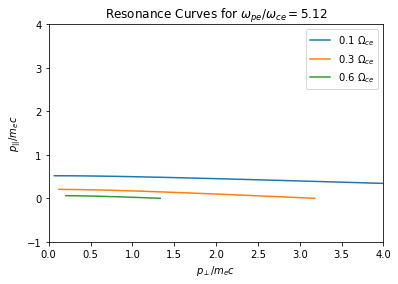

In [29]:
vParallel = c*np.linspace(-.99, 0, num = 100)
mlat = 0
L = 4
n0 = 60.5E6 # Density at the time

# Calculate and plot resutls
vPerp = resCurveVperp(vParallel, 0.1*wce(mlat, L), n0, mlat, L)
pPerp, pParallel = p(vPerp, vParallel)
plt.plot(pPerp, -pParallel, label = r'$0.1 \ \Omega_{ce}$')

vPerp = resCurveVperp(vParallel, 0.3*wce(mlat, L), n0, mlat, L)
pPerp, pParallel = p(vPerp, vParallel)
plt.plot(pPerp, -pParallel, label = r'$0.3 \ \Omega_{ce}$')

vPerp = resCurveVperp(vParallel, 0.6*wce(mlat, L), n0, mlat, L)
pPerp, pParallel = p(vPerp, vParallel)
plt.plot(pPerp, -pParallel, label = r'$0.6 \ \Omega_{ce}$')

plt.ylim((-1, 4))
plt.xlim((0, 4))
plt.xlabel(r'$p_{\perp}/m_e c$')
plt.ylabel(r'$p_{||}/m_e c$')
plt.title(r'Resonance Curves for $\omega_{pe} / \omega_{ce} = $' + str(round(wpe(n0, mlat)/wce(mlat, L), 2)))
plt.legend()